# TP 2 - SERIES TEMPORALES

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import scipy as sp
from scipy import io as sio
from scipy import signal as sig
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [38]:
path = os.getcwd() + '/'  # definimos el path 
mat = sio.loadmat(path + 'data/' + 'S02.mat') # cargamos los datos de un sujeto 
data = mat['data']  
tpts = data.shape[2] # definimos los time-points
srate = 1000 / np.divide(800, tpts - 1) # definimos el sampling rate

Calculamos el power en función de la frecuencia usando el método de welch para cada trial y sensor para el sujeto S02.mat:

In [39]:
arr = np.ndarray((data.shape[0], data.shape[1], 101)) # creamos un array vacio

for trl in range(0, data.shape[0]):
    for sensor in range(0, data.shape[1]):
        f, pxx = sig.welch(x=data[trl, sensor, :],
                           fs=srate, nperseg=tpts,
                           scaling='density', noverlap=None) # realiizamos el analisis de tiempo-frecuencia
        pxx = pxx.reshape([1, 101])
        arr[trl, sensor] = pxx 

Graficamos el power en función de la frecuencia para cada electrodo del sujeto S02:

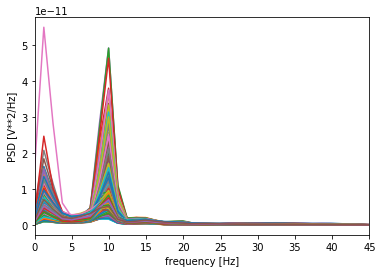

In [40]:
avg_trls = np.mean(arr, axis=0).transpose() # trasponer matriz para graficar

plt.plot(f, avg_trls) # graficar 
plt.xlim(xmin = 0, xmax = 45)
plt.xlabel('frequency [Hz]') 
plt.ylabel('PSD [V**2/Hz]')

Calculamos la media entre los electrodos 8, 44, 80, 131 y 185 para el sujeto S02, y graficamos los resultados utilizando un heatmap:

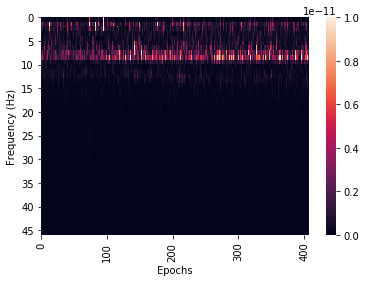

In [17]:
# Computamos la media entre los electrodos
avg_sens = np.mean(arr[:, [7, 43, 79, 130, 184], :], axis=1).transpose() 

# Graficamos en un heatmap
ax = sns.heatmap(data=avg_sens, vmin=0, vmax=1e-11) 
plt.ylim(46, 0)
ax.set_yticks(list(range(0, 46, 5)))
ax.set_yticklabels(str(y) for y in list(range(0, 46, 5)))
ax.set_xticks(list(range(0, 401, 100)))
ax.set_xticklabels([str(x) for x in list(range(0, 401, 100))])
plt.xlabel('Epochs')
plt.ylabel('Frequency (Hz)')

Calculamos los valores de cada banda de frecuencia, promediados entre los electrodos y epochs para cada sujeto:

In [18]:
# Definimos el nombre de los archivos a cargar
archivos=np.array(['P01.mat','P02.mat','P03.mat','P04.mat','P05.mat','P06.mat','P07.mat','P08.mat','P09.mat','P10.mat','S01.mat','S02.mat','S03.mat','S04.mat','S05.mat','S06.mat','S07.mat','S08.mat','S09.mat','S10.mat'])

# Definimos bandas de frecuencias
f_mask_delta=(f<4)
f_mask_theta=(f>=4) & (f<8)
f_mask_alpha=(f>=8) & (f<13)
f_mask_beta=(f>=13)  & (f<30)
f_mask_gamma=(f>=30) & (f<45)

# Calculamos potencia media para cada sujeto en cada banda de frecuencia 
pot_banda=np.ndarray((len(archivos),5))
pot_total=np.ndarray((20,1))

for i in range(0,20):
    #print(archivos[i])
    mat = sio.loadmat(path + '/data/' + archivos[i])
    data = mat['data'] # trials x electrodes x timepoints
    arr = np.ndarray((data.shape[0], data.shape[1], 101))
    for trl in range(0, data.shape[0]):
        for sensor in range(0, data.shape[1]):
            f, pxx = sig.welch(x=data[trl, sensor, :],fs=srate, nperseg=tpts, scaling='density', noverlap=None)
            pxx = pxx.reshape([1, 101])
            arr[trl, sensor] = pxx
    pot_media_freq=np.mean(np.mean(arr,axis=0),axis=0)
    pot_banda[i,0]=np.mean(pot_media_freq[f_mask_delta])
    pot_banda[i,1]=np.mean(pot_media_freq[f_mask_theta])
    pot_banda[i,2]=np.mean(pot_media_freq[f_mask_alpha])
    pot_banda[i,3]=np.mean(pot_media_freq[f_mask_beta])
    pot_banda[i,4]=np.mean(pot_media_freq[f_mask_gamma])
    pot_total[i]=np.sum(pot_media_freq[:])
    
print ('Done')

Done


In [19]:
# definimos la potencia en cada banda de frecuencia 
pot_delta = pot_banda[:,0]
pot_theta = pot_banda[:,1]
pot_alpha = pot_banda[:,2]
pot_beta = pot_banda[:, 3]
pot_gamma = pot_banda[:,4]

Graficamos (utilizando diferentes tipos de visualización) la potencia en la banda Alpha para grupo de sujetos (pacientes_s vs. pacientes_p):

([<matplotlib.axis.XTick at 0x7fa71c7a0358>,
 <a list of 2 Text xticklabel objects>)

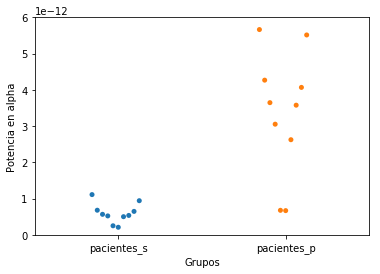

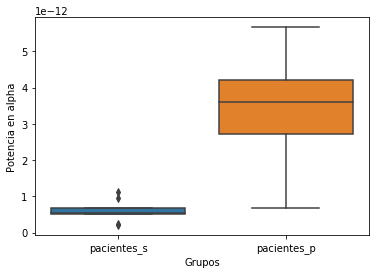

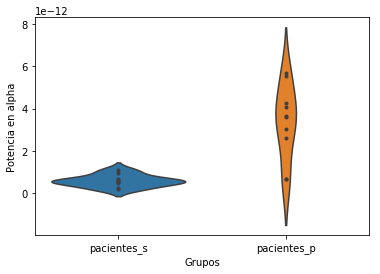

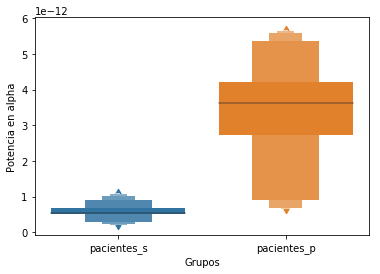

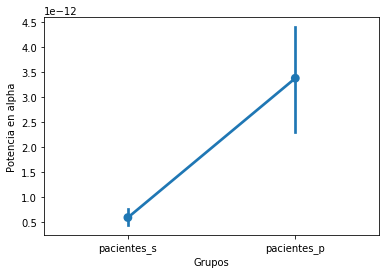

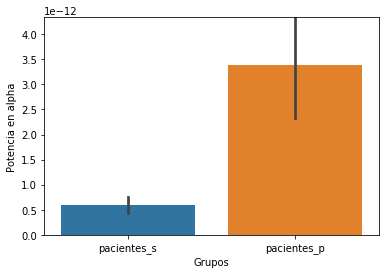

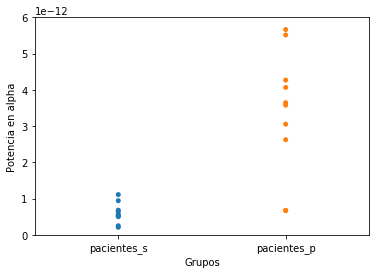

In [21]:
# Definimos los datos a graficar
data1=np.ndarray((2,20))
data1[0,:]=pot_banda[:,2]
data1[1,0:10] = 1
data1[1,10:] = 2
df2 = pd.DataFrame({ 'Potencia en alpha' :data1[0,:], 'Grupos' :data1[1,:],})

# Diferentes plots... 
plt.figure()  
ax = sns.swarmplot(x="Grupos", y="Potencia en alpha",data=df2)
plt.ylim(0,0.6e-11)
plt.xticks(np.arange(2), ('pacientes_s', 'pacientes_p'))

plt.figure()
ax = sns.boxplot(x="Grupos", y="Potencia en alpha",data=df2)
plt.xticks(np.arange(2), ('pacientes_s', 'pacientes_p'))

plt.figure()
ax = sns.violinplot(x="Grupos", y="Potencia en alpha",data=df2, inner='point') 
plt.xticks(np.arange(2), ('pacientes_s', 'pacientes_p'))

plt.figure()
ax = sns.lvplot(x="Grupos", y="Potencia en alpha",data=df2)
plt.xticks(np.arange(2), ('pacientes_s', 'pacientes_p'))

plt.figure()
ax = sns.pointplot(x="Grupos", y="Potencia en alpha",data=df2)
plt.xticks(np.arange(2), ('pacientes_s', 'pacientes_p'))

plt.figure()
ax = sns.barplot(x="Grupos", y="Potencia en alpha",data=df2)
plt.xticks(np.arange(2), ('pacientes_s', 'pacientes_p'))

plt.figure()
ax = sns.stripplot(x="Grupos", y="Potencia en alpha",data=df2)
plt.ylim(0,0.6e-11)
plt.xticks(np.arange(2), ('pacientes_s', 'pacientes_p'))


Creemos que el "violinplot" resulta el método de visualización más informativo respecto de las características de la distribución de los datos. 

Para cada banda de frecuencia, graficamos los datos obtenidos para cada sujeto en cada grupo utilizando un violinplot. Además, computamos las diferencias estadísticas entre las potencias medias en cada banda de frecuencia para cada grupo, utilizando el test de rangos de Wilcoxon. Usamos este último test porque no asume normalidad ni igualdad de varianza entre las muestras.

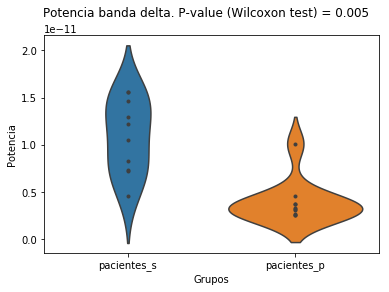

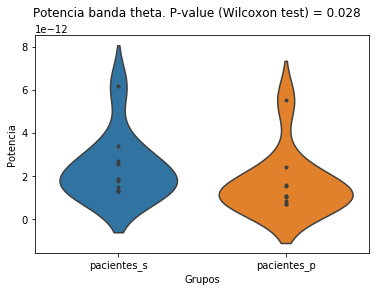

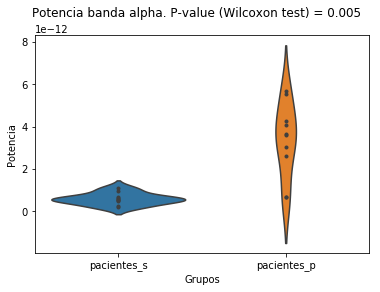

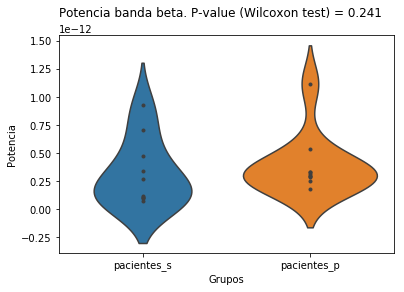

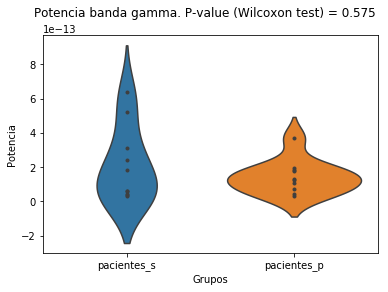

In [22]:
# Definimos badas de frecuencias 
bandas=np.array(['delta','theta','alpha','beta','gamma'])

for i in range(0,5): # Para cada banda de frecuencia...
    g1_power=pot_banda[:10,i]
    g2_power=pot_banda[10:,i]
    
    # Comparamos estadísitcamente la potencia entre ambos grupos, utilizando el test de Wilcoxon
    w_st, w_p_value =sp.stats.wilcoxon(x=g1_power, y=g2_power, zero_method='wilcox', correction=False)
    
    # Graficamos los resultados utilizando el violinplot
    data1[0,:]=pot_banda[:,i]
    data1[1,0:10]=1
    data1[1,10:]=2
    df2 = pd.DataFrame({ 'Potencia' :data1[0,:], 'Grupos' :data1[1,:],}) 
    fig=plt.figure()
    ax = sns.violinplot(x='Grupos', y ='Potencia', data=df2, inner = 'point')
    fig.suptitle('Potencia banda '+ bandas[i] + '. P-value (Wilcoxon test) = ' + str(round(w_p_value,3)))
    plt.xticks(np.arange(2), ('pacientes_s', 'pacientes_p'))


Normalizamos las potencias obtenidas en cada banda de frecuencia. Con estos resultados, comparamos estadísticamente los valores entre ambos grupos en cada banda de frecuencia. Finalmente hacemos un "violinplot" para graficar los resultados. 

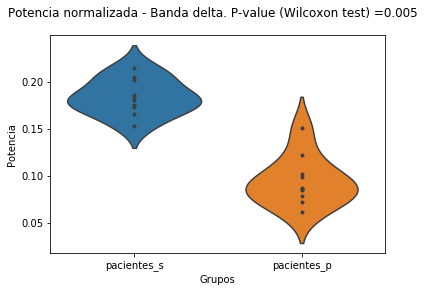

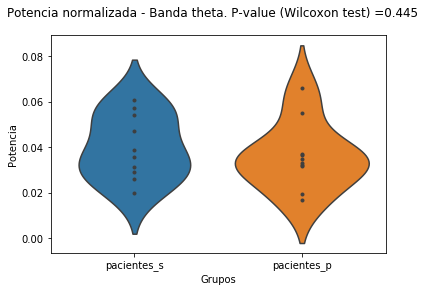

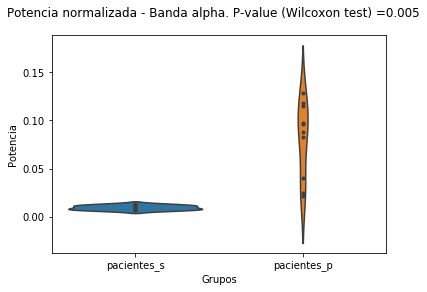

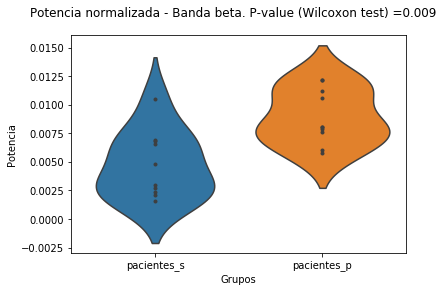

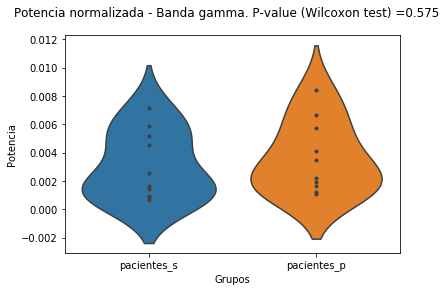

In [27]:
pot_freq_norm=np.ndarray((20,5)) #creamos array vacío

for i in range(0,5):
    for suj in range(0,20):
        pot_freq_norm[suj,i]=pot_banda[suj,i]/pot_total[suj] #normalizamos los datos
    g1_power=pot_freq_norm[:10,i]
    g2_power=pot_freq_norm[10:,i]
    
    # Computamos las diferencias significativas entre los valores normalizados para cada grupo
    w_st, w_p_value =sp.stats.wilcoxon(x=g1_power, y=g2_power, zero_method='wilcox', correction=False) 
    
    # Graficamos los resultados utilizando el violinplot
    data1[0,:]=pot_freq_norm[:,i]
    data1[1,0:10]=1
    data1[1,10:]=2
    df_norm = pd.DataFrame({ 'Potencia' :data1[0,:], 'Grupos' :data1[1,:],})
    fig=plt.figure()
    ax = sns.violinplot(x="Grupos", y="Potencia", data=df_norm, inner = 'point')
    fig.suptitle('Potencia normalizada - Banda '+bandas[i]+". P-value (Wilcoxon test) ="+str(round(w_p_value,3)))
    plt.xticks(np.arange(2), ('pacientes_s', 'pacientes_p'))


Calculamos la entropía para cada electrodo, y la entropía conjunta para cada par de electrodos, promediando luego los resultados entre canales y epochs para cada sujeto:

In [ ]:
# Creamos matrices vacías
entr_1=np.ndarray((20,256)) 
entr_2=np.ndarray((20,256,256))

# Calculamos la entropía y la entropía conjunta para cada electrodo y pares de electrodos
for suj in range(0,20):
    mat = sio.loadmat(path + '/data/' + archivos[suj])
    data = mat['data'] # trials x electrodes x timepoints
    arr = np.ndarray((data.shape[0], data.shape[1], 101))
    for sensor1 in range(0, data.shape[1]-1):
        print(archivos[suj]+"sensor "+str(sensor1))    
        dd=(data.shape[0]*data.shape[2])
        x=np.reshape(data[:,sensor1,:],dd)
        for sensor2 in range (sensor1+1, data.shape[1]):
            y=np.reshape(data[:,sensor2,:],dd)
            h1,h2,h3=np.histogram2d(x, y, bins=20, range=None, normed=False, weights=None)
            h1=h1/(np.sum(np.sum(h1)))
            entr_2[suj,sensor1,sensor2]=-1*sum(sum(h1*np.log2(h1+1e-10))) # Calculo de entropía inter-electrodo
        h1[0,:]=np.sum(h1,axis=1)
        h1[0,:]=h1[0,:]/np.sum(h1[0,:])
        entr_1[suj,sensor1]=-1*sum(h1[0,:]*np.log2(h1[0,:]+1e-10)) # Calculo de entropía intra-electrodo

# Promediamos los valores de cada tipo de entropía (intra e inter electrodo) entre canales y epochs para cada suj.
entropia1 = np.mean(entr_1,axis=1) # Promedio de entropía intra-electrodo 
entropia2 = np.sum(entr_2,axis=1)/(256*(256-1)/2) # Promedio de entropía inter-electrodo 

# Separamos los resultados obtenidos para cada grupo 
g1_entr_1=entropia1[:10] # Entropía intra-electrodo para el grupo de pacientes_p
g2_entr_1=entropia1[10:] # Entropía intra-electrodo para el grupo de pacientes_s
g1_entr_2=entropia2[:10] # Entropía inter-electrodo para el grupo de pacientes_p
g2_entr_2=entropia2[10:] # Entropía inter-electrodo para el grupo de pacientes_s


P01.matsensor 0
P01.matsensor 1


In [29]:
# Cargamos datos de entropía
g1_entr_1 = np.load(file= path + '/data/g1_entr_1.npy')
g2_entr_1 = np.load(file= path + '/data/g2_entr_1.npy')
g1_entr_2 = np.load(file= path + '/data/g1_entr_2.npy')
g2_entr_2 = np.load(file= path + '/data/g2_entr_2.npy')
entropia1 = np.load(file= path + '/data/entropia1.npy')
entropia2 = np.load(file= path + '/data/entropia2.npy')

Calculamos las diferencias significativas (Wilcoxon Test) entre los valores promedio de entropía intra-electrodo de los sujetos de cada grupo, y graficamos utilizando un violinplot:

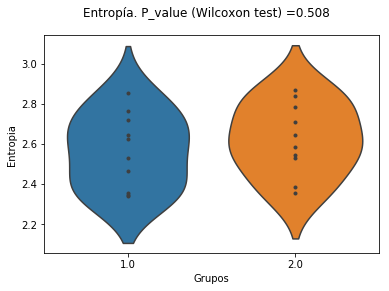

In [31]:
# Calculamos las diferencias significativas entre las medidas de entropía intra-electrodo de cada grupo, 
# utilizando el Wilcoxon test:
w_st_1, w_p_value_1 =sp.stats.wilcoxon(x=g1_entr_1, y=g2_entr_1, zero_method='wilcox', correction=False)

# Graficamos utilizando el violinplot
data1[0,:]=entropia1
data1[1,0:10]=1
data1[1,10:]=2
df2 = pd.DataFrame({ 'Entropia' :data1[0,:], 'Grupos' :data1[1,:],})
fig=plt.figure()
ax = sns.violinplot(x='Grupos', y='Entropia', data=df2, inner = 'point')
fig.suptitle('Entropía. P_value (Wilcoxon test) =' + str(round(w_p_value_1,3)))


Repetimos el mismo análisis para la entropía mutua (inter-electrodo):

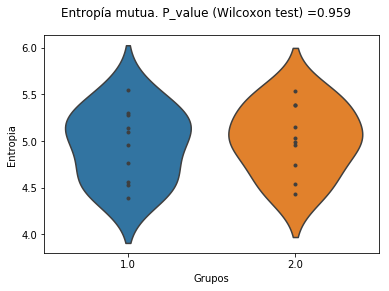

In [34]:
# Calculamos las diferencias significativas entre las medidas de entropía intra-electrodo de cada grupo, 
# utilizando el Wilcoxon test:
w_st_1, w_p_value_1 =sp.stats.wilcoxon(x=g1_entr_2, y=g2_entr_2, zero_method='wilcox', correction=False)

# Graficamos utilizando el violinplot
data1[0,:]=entropia2
data1[1,0:10]=1
data1[1,10:]=2
df2 = pd.DataFrame({ 'Entropia' :data1[0,:], 'Grupos' :data1[1,:],})
fig=plt.figure()
ax = sns.violinplot(x='Grupos', y='Entropia', data=df2, inner = 'point')
fig.suptitle('Entropía mutua. P_value (Wilcoxon test) =' + str(round(w_p_value_1,3)))
